In [49]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import _pickle as cPickle
import bz2
import matplotlib.image as mpimg
from mpl_toolkits.basemap import Basemap

# Removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [2]:
def compressed_pickle(title, data):
    with bz2.BZ2File('./data/output/' + title + '.pbz2', 'w') as f:
        cPickle.dump(data, f)
        
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

In [3]:
hour_trips_dict = decompress_pickle('./data/output/bixi_data_2016_2017_2018.pbz2')
_2019_data = decompress_pickle('./data/output/bixi_data_2019.pbz2')

In [4]:
zf = ZipFile('./data/bixi/biximontrealrentals2019-33ea73.zip')

In [5]:
bixi_2019_stations = pd.read_csv(zf.open('Stations_2019.csv'), dtype={'name': 'str'})

In [9]:
common_stations = list(_2019_data.keys())

In [16]:
common_station_data = bixi_2019_stations[bixi_2019_stations['Code'].isin(common_stations)]

In [17]:
common_station_data

,Code,name,latitude,longitude
0,10002,Métro Charlevoix (Centre / Charlevoix),45.478,-73.570
4,5002,St-Charles / Montarville,45.534,-73.515
5,5003,Place Longueuil,45.528,-73.517
6,5004,St-Charles / Grant,45.540,-73.509
7,5005,St-Charles / St-Jean,45.537,-73.512
...,...,...,...,...
461,6926,Marie-Anne / St-Hubert,45.525,-73.579
462,6927,Édouard-Montpetit / de Stirling,45.507,-73.615
463,6928,Jean-Brillant / McKenna,45.499,-73.619
464,6929,St-André / St-Grégoire,45.531,-73.592


In [48]:
common_station_data['latitude'].describe()

count   463.000
mean     45.520
std       0.028
min      45.417
25%      45.502
50%      45.524
75%      45.539
max      45.640
Name: latitude, dtype: float64

In [73]:
mtl_img=mpimg.imread('./mtl.png')

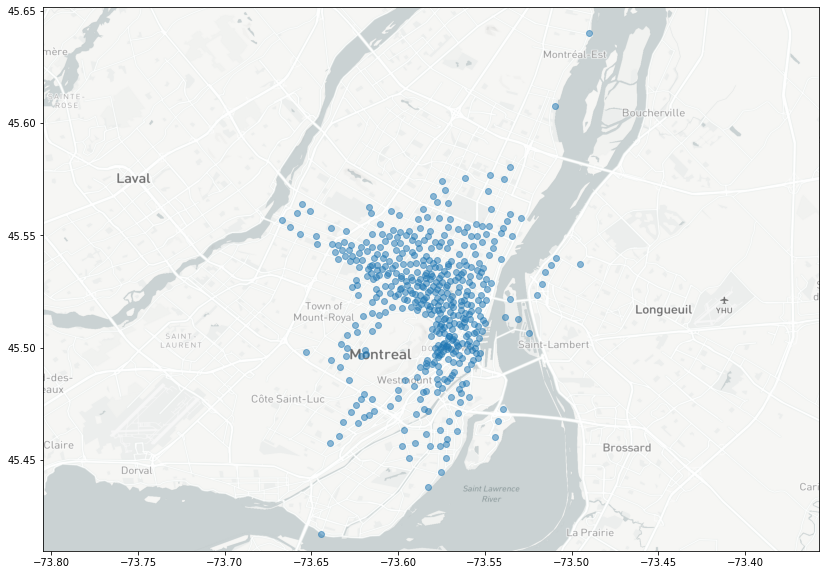

In [74]:
lon = common_station_data['longitude']
lat = common_station_data['latitude']

longitude_top_left = -73.8048
longitude_top_right = -73.3571
latitude_bottom_left = 45.4095
latitude_top_left = 45.6517

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.imshow(mtl_img, extent=[longitude_top_left,longitude_top_right,latitude_bottom_left,latitude_top_left], aspect=1.294)
ax.scatter(lon, lat, alpha=0.5)